<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/Copy_of_Likert_June_13_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Online version using Google Colab

Needs to upload the Excel data file (FemData_Exp2.xlsx), everytime the session is re-started.

In [ ]:
#How to get rid of ONLY the rows with more than 5 missing values?

In [ ]:
# Install necessary libraries (quietly)
!pip install --quiet xlrd

In [ ]:
# Install Likert library plot-likert
!pip install --quiet plot-likert

In [ ]:
import pandas as pd
import numpy as np
import xlrd
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Not needed here
# import os
# os.getcwd()

In [ ]:
# No longer needed, using xlrd instead.
#pip install openpyxl

In [ ]:
# Read the Excel data file
#fem_df = pd.read_excel("C:\\Users\\maisu\\OneDrive\\Desktop\\SES Qual Data\\CGT\\Exp\\Data4Exp\\More\\Exp\\FemData_Exp2.xlsx")
fem_df = pd.read_excel('FemData_Exp2.xlsx')



In [ ]:
fem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CaseNum   1348 non-null   object
 1   Age       1348 non-null   object
 2   SchoolYr  1348 non-null   object
 3   Race      1348 non-null   object
 4   GCQ3A     1348 non-null   object
 5   GCQ3B     1348 non-null   object
 6   GCQ3C     1348 non-null   object
 7   GCQ3D     1348 non-null   object
 8   GCQ3E     1348 non-null   object
 9   GCQ3F     1348 non-null   object
 10  GCQ3G     1348 non-null   object
 11  GCQ3H     1348 non-null   object
 12  GCQ3I     1348 non-null   object
 13  GCQ3J     1348 non-null   object
 14  GCQ3K     1348 non-null   object
 15  GCQ3L     1348 non-null   object
 16  ESECONVA  1338 non-null   object
 17  ESECONVB  1338 non-null   object
 18  ESECONVC  1338 non-null   object
 19  ESECONVD  1338 non-null   object
 20  ESECONVE  1338 non-null   object
 21  ESECONVF  1338

## Note:
The function `df.info()`, gives a general overview of the dataset.

The dataset has 1354 rows of data and 26 columns. Some columns have 1348 rows and other 1338 rows.

We can next find out which columns have missing data and how many.

Apply: `df.isnull().sum()`

In [ ]:
fem_df.isnull().sum()

CaseNum      6
Age          6
SchoolYr     6
Race         6
GCQ3A        6
GCQ3B        6
GCQ3C        6
GCQ3D        6
GCQ3E        6
GCQ3F        6
GCQ3G        6
GCQ3H        6
GCQ3I        6
GCQ3J        6
GCQ3K        6
GCQ3L        6
ESECONVA    16
ESECONVB    16
ESECONVC    16
ESECONVD    16
ESECONVE    16
ESECONVF    16
ESECONVG    16
ESECONVH    16
ESECONVI    16
ESECONVJ    16
dtype: int64

## Note:
Need to decide if we eliminate rows of incomplete data and also `age` must be a numeric variable.

In [ ]:
# Preserve original data frame: fem_df.
# Create a new clean dataframe by dropping rows with missing data: fem_dfC
fem_df_temp = fem_df.copy()
fem_dfC = fem_df_temp.dropna()
fem_dfC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1353
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CaseNum   1338 non-null   object
 1   Age       1338 non-null   object
 2   SchoolYr  1338 non-null   object
 3   Race      1338 non-null   object
 4   GCQ3A     1338 non-null   object
 5   GCQ3B     1338 non-null   object
 6   GCQ3C     1338 non-null   object
 7   GCQ3D     1338 non-null   object
 8   GCQ3E     1338 non-null   object
 9   GCQ3F     1338 non-null   object
 10  GCQ3G     1338 non-null   object
 11  GCQ3H     1338 non-null   object
 12  GCQ3I     1338 non-null   object
 13  GCQ3J     1338 non-null   object
 14  GCQ3K     1338 non-null   object
 15  GCQ3L     1338 non-null   object
 16  ESECONVA  1338 non-null   object
 17  ESECONVB  1338 non-null   object
 18  ESECONVC  1338 non-null   object
 19  ESECONVD  1338 non-null   object
 20  ESECONVE  1338 non-null   object
 21  ESECONVF  1338

In [ ]:
# Investigate further
fem_dfC['Age'].value_counts()

18    376
19    297
20    261
21    228
22     92
23     25
24     18
26     12
25     10
27      9
17      9
        1
Name: Age, dtype: int64

In [ ]:
# There is still one row wit no Age information
fem_dfC[fem_dfC['Age'] == ' ']

,CaseNum,Age,SchoolYr,Race,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
881,21200108,,2,,2,3,2,2,1,1,...,2,1,1,1,1,1,1,1,1,1


In [ ]:
# Drop the row with no Age information, or keep everything else
fem_dfC = fem_dfC[fem_dfC['Age'] != ' ']
fem_dfC['Age'].value_counts()

18    376
19    297
20    261
21    228
22     92
23     25
24     18
26     12
25     10
27      9
17      9
Name: Age, dtype: int64

In [ ]:
# Convert the age variable to numeric and check
fem_dfC['Age'] = pd.to_numeric(fem_dfC['Age'])
fem_dfC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1353
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CaseNum   1337 non-null   object
 1   Age       1337 non-null   int64 
 2   SchoolYr  1337 non-null   object
 3   Race      1337 non-null   object
 4   GCQ3A     1337 non-null   object
 5   GCQ3B     1337 non-null   object
 6   GCQ3C     1337 non-null   object
 7   GCQ3D     1337 non-null   object
 8   GCQ3E     1337 non-null   object
 9   GCQ3F     1337 non-null   object
 10  GCQ3G     1337 non-null   object
 11  GCQ3H     1337 non-null   object
 12  GCQ3I     1337 non-null   object
 13  GCQ3J     1337 non-null   object
 14  GCQ3K     1337 non-null   object
 15  GCQ3L     1337 non-null   object
 16  ESECONVA  1337 non-null   object
 17  ESECONVB  1337 non-null   object
 18  ESECONVC  1337 non-null   object
 19  ESECONVD  1337 non-null   object
 20  ESECONVE  1337 non-null   object
 21  ESECONVF  1337

<ipython-input-29-55fbce1ab24e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_dfC['Age'] = pd.to_numeric(fem_dfC['Age'])


In [ ]:
# Do basic statistics of the Age distribution
fem_dfC['Age'].describe()

count    1337.000000
mean       19.751683
std         1.737134
min        17.000000
25%        18.000000
50%        19.000000
75%        21.000000
max        27.000000
Name: Age, dtype: float64

In [ ]:
# Explore different values for SchoolYr
fem_dfC['SchoolYr'].value_counts()

1    470
3    318
2    295
4    247
5      4
       3
Name: SchoolYr, dtype: int64

In [ ]:
# There is still one row wit noSchoolYr information
fem_dfC[fem_dfC['SchoolYr'] == ' ']

,CaseNum,Age,SchoolYr,Race,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
898,21200125,20,,4,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
1075,2130077,22,,3,2,2,2,2,2,2,...,3,4,3,3,3,4,2,3,4,3
1265,2150089,21,,8,3,3,3,3,2,3,...,4,2,2,1,2,1,3,2,1,1


In [ ]:
# Drop the row with no SchoolYr information, or keep everything else
fem_dfC = fem_dfC[fem_dfC['SchoolYr'] != ' ']
fem_dfC['SchoolYr'].value_counts()

1    470
3    318
2    295
4    247
5      4
Name: SchoolYr, dtype: int64

In [ ]:
fem_df['Race'].value_counts()

1    549
3    242
4    210
2    160
8    141
7     29
5      9
0      3
       3
6      2
Name: Race, dtype: int64

In [ ]:
# Drop the row with no Race information, or keep everything else
fem_dfC = fem_dfC[fem_dfC['Race'] != ' ']
fem_dfC['Race'].value_counts()

1    544
3    240
4    209
2    160
8    140
7     29
5      9
6      2
Name: Race, dtype: int64

In [ ]:
# See if missing values in CaseNum variable
fem_dfC[fem_dfC['CaseNum'] == ' ']

,CaseNum,Age,SchoolYr,Race,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ


## Data Visualizations

Next we can explore the distribution of the first 3 variables: `Age`, `SchoolYr` and `Race`

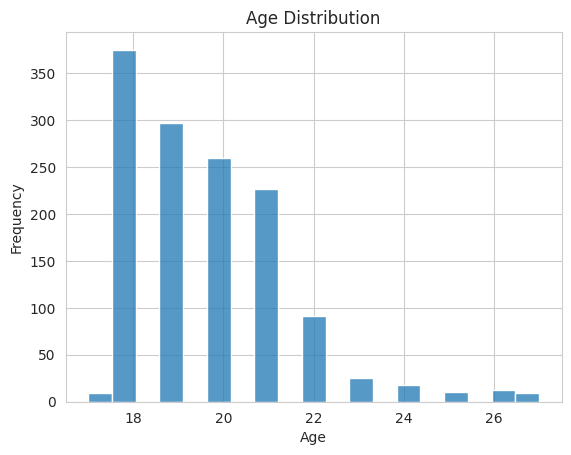

In [ ]:
# Make a histogram of Age distribution
sns.set_style("whitegrid")
ax = sns.histplot(data=fem_dfC, x="Age")
ax.set(xlabel='Age',
       ylabel='Frequency',
       title='Age Distribution')
plt.show();

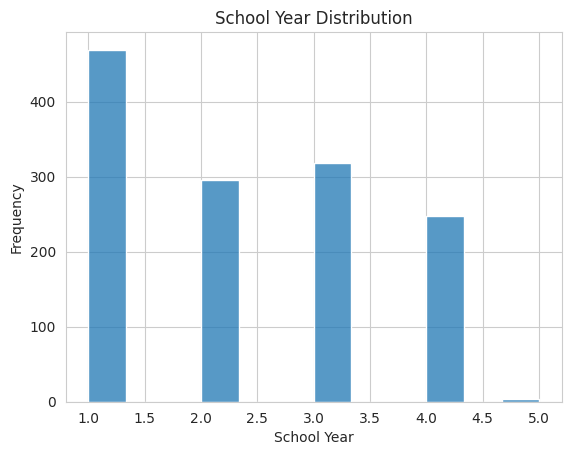

In [ ]:
# Show SchoolYr distribution
ax = sns.histplot(data=fem_dfC, x="SchoolYr")
ax.set(xlabel='School Year',
       ylabel='Frequency',
       title='School Year Distribution')
plt.show();

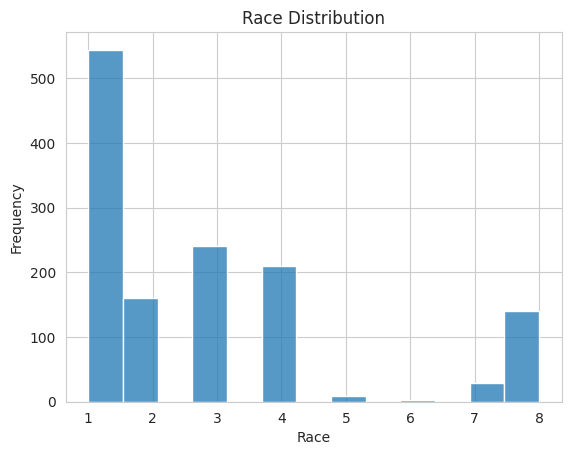

In [ ]:
# Make a histogram of Race distribution
sns.set_style("whitegrid")
ax = sns.histplot(data=fem_dfC, x="Race")
ax.set(xlabel='Race',
       ylabel='Frequency',
       title='Race Distribution')
plt.show();

## Likert Scale plots

Will prepare new dataframe for produce Likert plots.

In [ ]:
# Drop column of index using DataFrame.iloc[] and drop() methods.
df_answers0 = fem_dfC.drop(fem_dfC.iloc[:, 0:4],axis = 1)
df_answers0.head()


,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,GCQ3G,GCQ3H,GCQ3I,GCQ3J,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
0,3,3,3,3,3,3,3,3,0,3,...,2,1,1,1,1,1,2,1,1,1
1,2,1,1,1,2,3,2,2,0,3,...,2,2,1,1,1,1,2,2,1,2
2,2,2,1,2,2,2,2,2,1,2,...,2,1,1,1,1,1,2,2,2,1
3,3,3,2,3,3,3,3,3,1,2,...,2,2,1,1,1,1,3,2,2,2
4,3,3,1,2,3,2,3,2,0,3,...,2,2,2,1,1,1,2,2,1,1


In [ ]:
df_answers0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1353
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GCQ3A     1333 non-null   object
 1   GCQ3B     1333 non-null   object
 2   GCQ3C     1333 non-null   object
 3   GCQ3D     1333 non-null   object
 4   GCQ3E     1333 non-null   object
 5   GCQ3F     1333 non-null   object
 6   GCQ3G     1333 non-null   object
 7   GCQ3H     1333 non-null   object
 8   GCQ3I     1333 non-null   object
 9   GCQ3J     1333 non-null   object
 10  GCQ3K     1333 non-null   object
 11  GCQ3L     1333 non-null   object
 12  ESECONVA  1333 non-null   object
 13  ESECONVB  1333 non-null   object
 14  ESECONVC  1333 non-null   object
 15  ESECONVD  1333 non-null   object
 16  ESECONVE  1333 non-null   object
 17  ESECONVF  1333 non-null   object
 18  ESECONVG  1333 non-null   object
 19  ESECONVH  1333 non-null   object
 20  ESECONVI  1333 non-null   object
 21  ESECONVJ  1333

In [ ]:
df_answers0.iloc[:,3].value_counts()

3    719
2    419
1    172
0     19
       4
Name: GCQ3D, dtype: int64

In [ ]:
df_answers0.iloc[:,20].value_counts()

1    831
2    268
3    121
5     57
4     46
      10
Name: ESECONVI, dtype: int64

In [ ]:
# Create additional No Answer (NA)
df_answers01 = df_answers0.copy()
df_answers01 = df_answers01.replace(' ', 'NA')

In [ ]:
df_answers01.iloc[:,1].value_counts()

3     651
2     506
1     143
0      25
NA      8
Name: GCQ3B, dtype: int64

In [ ]:
df_answers01.head(10)

,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,GCQ3G,GCQ3H,GCQ3I,GCQ3J,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
0,3,3,3,3,3,3,3,3,0,3,...,2,1,1,1,1,1,2,1,1,1
1,2,1,1,1,2,3,2,2,0,3,...,2,2,1,1,1,1,2,2,1,2
2,2,2,1,2,2,2,2,2,1,2,...,2,1,1,1,1,1,2,2,2,1
3,3,3,2,3,3,3,3,3,1,2,...,2,2,1,1,1,1,3,2,2,2
4,3,3,1,2,3,2,3,2,0,3,...,2,2,2,1,1,1,2,2,1,1
5,2,3,0,2,2,2,2,2,1,2,...,2,1,1,1,1,1,1,1,1,1
6,3,3,3,3,3,3,3,3,1,3,...,2,1,1,2,1,1,2,1,1,1
7,3,3,3,3,3,3,3,3,3,3,...,1,1,2,5,1,1,5,1,3,1
8,3,3,3,3,2,3,3,3,1,2,...,3,3,1,1,1,2,3,1,3,1
9,2,2,1,2,1,1,2,1,3,1,...,5,4,4,3,5,1,3,1,4,1


In [ ]:
df_answers01[df_answers01 == 5]

,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,GCQ3G,GCQ3H,GCQ3I,GCQ3J,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Convert answers to ordered categorical data

**Need table equivalence**

In [ ]:
# Scale: 'Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree'
# Another scale ['NA', 0, 1, 2, 3, 4, 5]
my_scale=['NA', 0, 1, 2, 3, 4, 5]
#df_answers01 = df_answers01.replace(0, 'Strongly disagree')
#df_answers01 = df_answers01.replace(1, 'Disagree')
#df_answers01 = df_answers01.replace('NA', 'Neither agree nor disagree')
#df_answers01 = df_answers01.replace(2, 'Agree')
#df_answers01 = df_answers01.replace(3, 'Strongly agree')

df_answers01.head()


,GCQ3A,GCQ3B,GCQ3C,GCQ3D,GCQ3E,GCQ3F,GCQ3G,GCQ3H,GCQ3I,GCQ3J,...,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
0,3,3,3,3,3,3,3,3,0,3,...,2,1,1,1,1,1,2,1,1,1
1,2,1,1,1,2,3,2,2,0,3,...,2,2,1,1,1,1,2,2,1,2
2,2,2,1,2,2,2,2,2,1,2,...,2,1,1,1,1,1,2,2,2,1
3,3,3,2,3,3,3,3,3,1,2,...,2,2,1,1,1,1,3,2,2,2
4,3,3,1,2,3,2,3,2,0,3,...,2,2,2,1,1,1,2,2,1,1


In [ ]:
CategoricalDtype(['NA', 0, 1, 2, 3, 4, 5], ordered=True)

df_cat01 = df_answers01.copy().astype("category")
df_cat01.dtypes


GCQ3A       category
GCQ3B       category
GCQ3C       category
GCQ3D       category
GCQ3E       category
GCQ3F       category
GCQ3G       category
GCQ3H       category
GCQ3I       category
GCQ3J       category
GCQ3K       category
GCQ3L       category
ESECONVA    category
ESECONVB    category
ESECONVC    category
ESECONVD    category
ESECONVE    category
ESECONVF    category
ESECONVG    category
ESECONVH    category
ESECONVI    category
ESECONVJ    category
dtype: object

In [ ]:
df_cat01['ESECONVC']

0       1
1       1
2       1
3       1
4       2
       ..
1349    2
1350    4
1351    1
1352    1
1353    1
Name: ESECONVC, Length: 1333, dtype: category
Categories (6, object): [1, 2, 3, 4, 5, 'NA']

In [ ]:
df_cat01['ESECONVC'].value_counts()

1     759
2     312
3     125
4      68
5      61
NA      8
Name: ESECONVC, dtype: int64

## Likert plots

Using [plot_likert library](https://github.com/nmalkin/plot-likert) to visualize results

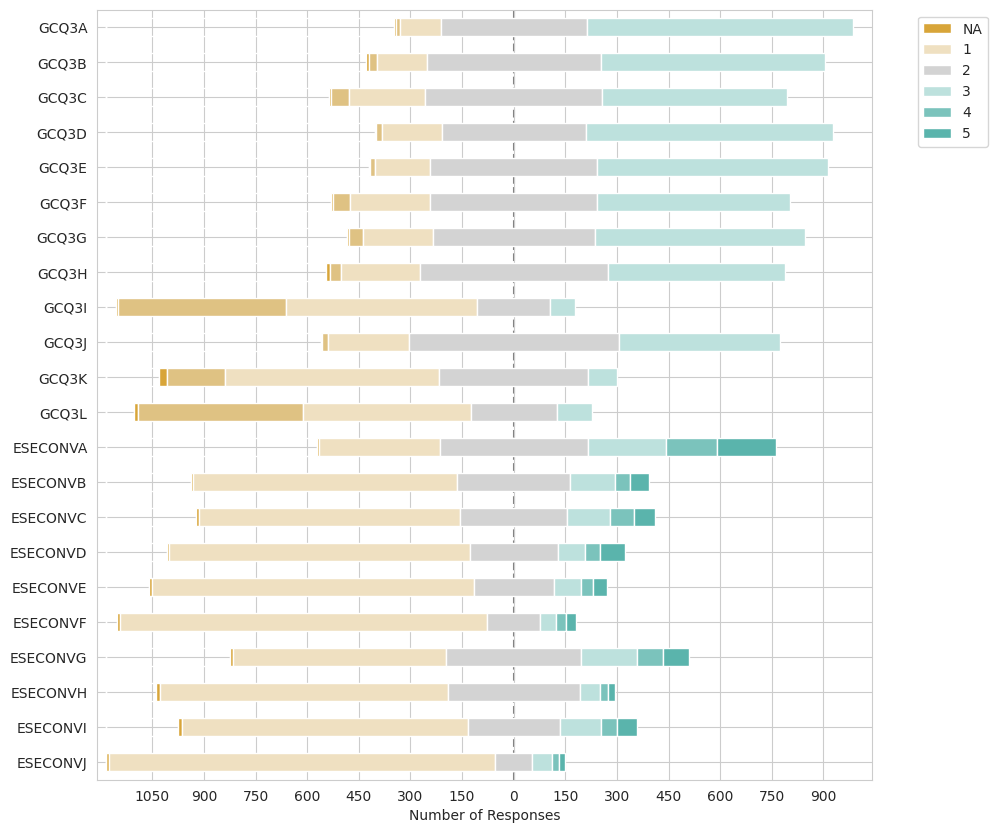

In [ ]:
plot_likert.plot_likert(df_cat01, my_scale, colors=plot_likert.colors.likert7, figsize=(10,10));

In [ ]:
# Create our own color table

my_color_scheme =[
    plot_likert.colors.TRANSPARENT,
    "brown",
    "red",
    "orange",
    "green",
    "blue",
    "violet",
    "purple",
]

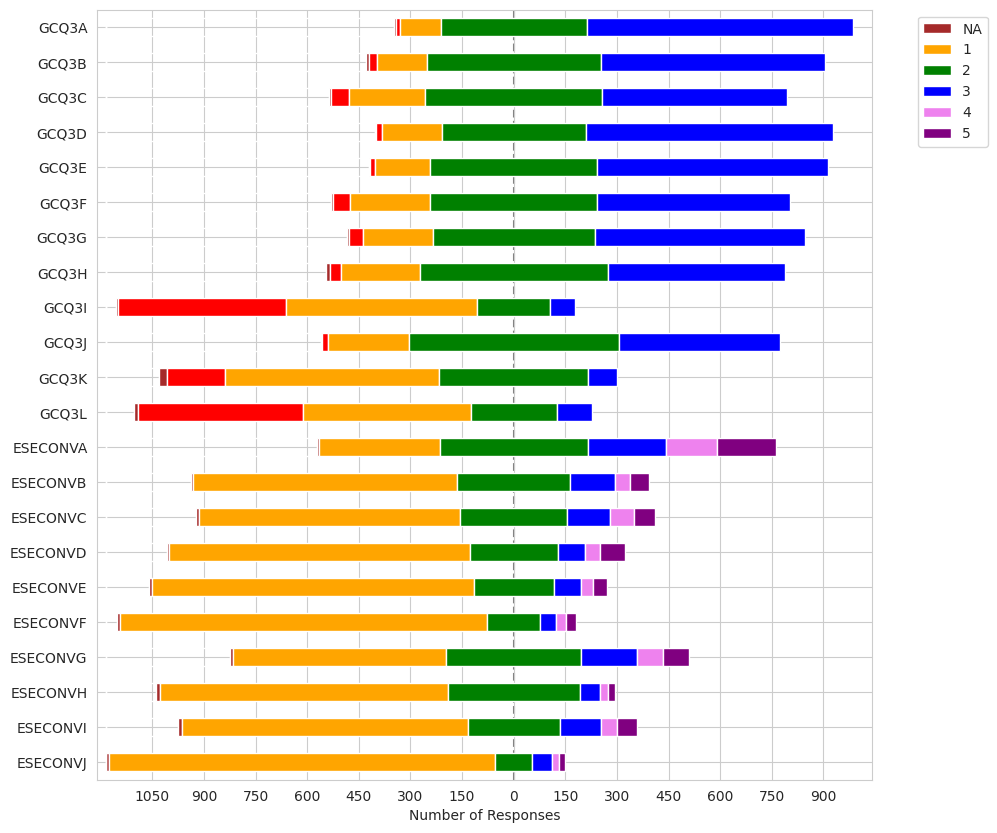

In [ ]:
plot_likert.plot_likert(df_cat01, my_scale, colors=my_color_scheme, figsize=(10,10));

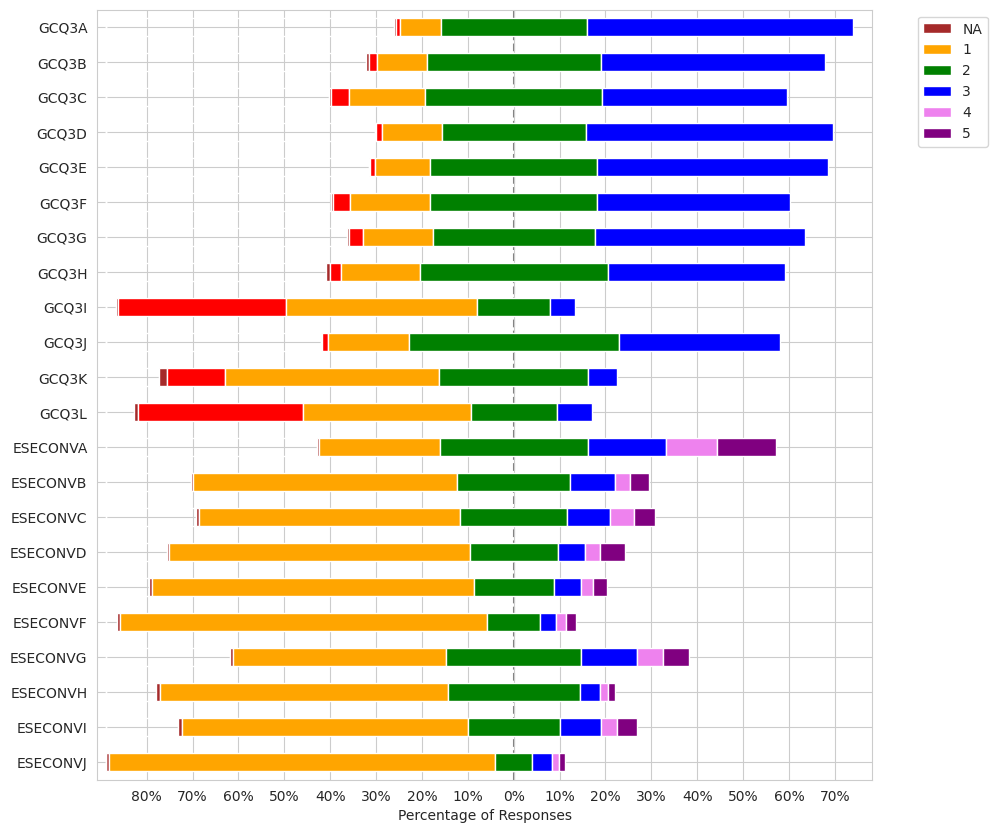

In [ ]:
plot_likert.plot_likert(df_cat01, my_scale, colors=my_color_scheme, figsize=(10,10), plot_percentage=True);

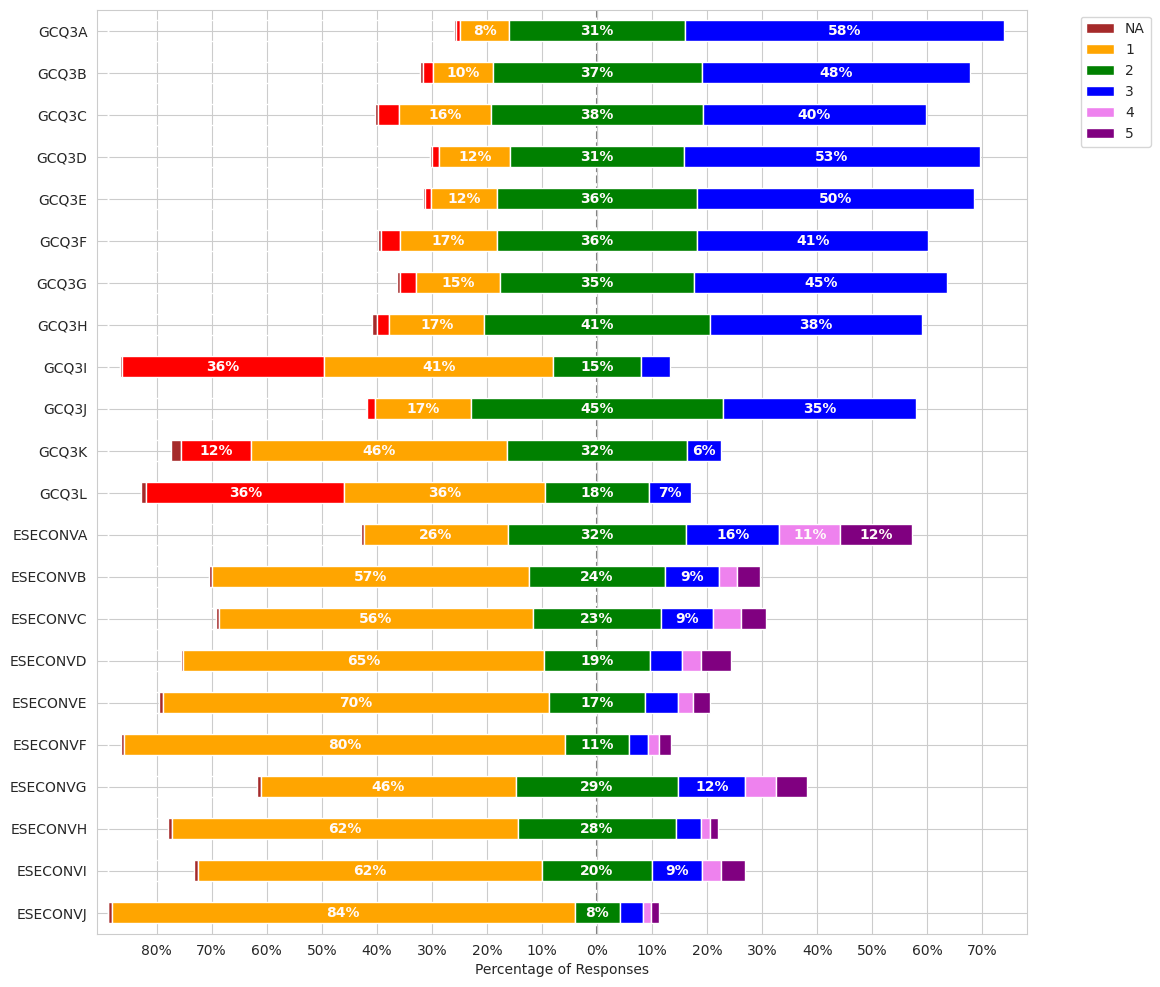

In [ ]:
plot_likert.plot_likert(df_cat01, my_scale, colors=my_color_scheme, figsize=(12,12),
                        bar_labels=True, bar_labels_color="snow", plot_percentage=True);

## Previous work

In [ ]:
fem_df.corr()

C:\Users\maisu\AppData\Local\Temp\ipykernel_8388\887244914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fem_df.corr()


""


In [ ]:
df_nomiss = fem_df.dropna()

In [ ]:
x_nomiss = df_nomiss[['GCQ3A', 'GCQ3B', 'GCQ3C', 'GCQ3D', 'GCQ3E', 'GCQ3F', 'GCQ3G', 'GCQ3H', 'GCQ3I', 'GCQ3J', 'GCQ3K', 'GCQ3L']]

In [ ]:
y_nomiss = df_nomiss[['ESECONVA', 'ESECONVB', 'ESECONVC', 'ESECONVD', 'ESECONVE', 'ESECONVF', 'ESECONVG', 'ESECONVH', 'ESECONVI', 'ESECONVJ']]

In [ ]:
x_nomiss_train, x_nomiss_test, y_nomiss_train, y_nomiss_test = train_test_split(x_nomiss, y_nomiss, test_size=0.2, random_state=42)

In [ ]:
model.fit(x_nomiss_train, y_nomiss_train)

ValueError: could not convert string to float: ''

In [ ]:
# Step 1: Identify the rows with missing values
missing_values = fem_df.isnull()

In [ ]:
# Step 2: Count the number of missing values in each row
missing_counts = missing_values.sum(axis=1)

In [ ]:
# Step 3: Filter the rows
condition = missing_counts <= 5

In [ ]:
# Step 4: Remove the filtered rows
filt_df = fem_df[condition]

In [ ]:
# Check
if len(filt_df) < len(fem_df):
    print("Rows with more than 5 missing values were removed.")
else:
    print("No rows were removed.")

Rows with more than 5 missing values were removed.


In [ ]:
# Would using a placeholder for the other missing values interfere with data analysis?

In [ ]:
# How do I deal with the other missing values without imputing or removing the rows?

In [ ]:
# About 1350 participant responses recorded in the dataset with over 70 of them having one or more missing values.

In [ ]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1353
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CaseNum   1338 non-null   object
 1   Age       1338 non-null   object
 2   SchoolYr  1338 non-null   object
 3   Race      1338 non-null   object
 4   GCQ3A     1338 non-null   object
 5   GCQ3B     1338 non-null   object
 6   GCQ3C     1338 non-null   object
 7   GCQ3D     1338 non-null   object
 8   GCQ3E     1338 non-null   object
 9   GCQ3F     1338 non-null   object
 10  GCQ3G     1338 non-null   object
 11  GCQ3H     1338 non-null   object
 12  GCQ3I     1338 non-null   object
 13  GCQ3J     1338 non-null   object
 14  GCQ3K     1338 non-null   object
 15  GCQ3L     1338 non-null   object
 16  ESECONVA  1338 non-null   object
 17  ESECONVB  1338 non-null   object
 18  ESECONVC  1338 non-null   object
 19  ESECONVD  1338 non-null   object
 20  ESECONVE  1338 non-null   object
 21  ESECONVF  1338

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = filt_df[['GCQ3A', 'GCQ3B', 'GCQ3C', 'GCQ3D', 'GCQ3E', 'GCQ3F', 'GCQ3G', 'GCQ3H', 'GCQ3I', 'GCQ3J', 'GCQ3K', 'GCQ3L']]

In [ ]:
y = filt_df[['ESECONVA', 'ESECONVB', 'ESECONVC', 'ESECONVD', 'ESECONVE', 'ESECONVF', 'ESECONVG', 'ESECONVH', 'ESECONVI', 'ESECONVJ']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.head()

,ESECONVA,ESECONVB,ESECONVC,ESECONVD,ESECONVE,ESECONVF,ESECONVG,ESECONVH,ESECONVI,ESECONVJ
571,2,1,1,1,1,1,1,2,1,1
1301,1,1,1,1,1,1,1,1,1,1
1155,3,3,2,1,2,1,2,1,2,2
982,3,3,3,3,4,3,3,5,4,2
495,1,1,1,2,1,1,1,1,1,1


In [ ]:
print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 1070
Test set size: 268


In [ ]:
print("Training set size:", y_train.shape[0])
print("Test set size:", y_test.shape[0])

Training set size: 1070
Test set size: 268


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: ''

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Replace empty strings with NaN
fem_df.replace('', np.nan, inplace=True)

In [ ]:
df_without_missing = fem_df.dropna()

In [ ]:
# Convert columns to float
float_columns = ['GCQ3A', 'GCQ3B', 'GCQ3C', 'GCQ3D', 'GCQ3E', 'GCQ3F', 'GCQ3G', 'GCQ3H', 'GCQ3I', 'GCQ3J', 'GCQ3K', 'GCQ3L']
df_without_missing[float_columns] = df_without_missing[float_columns].astype(float)

ValueError: could not convert string to float: ''

In [ ]:
df_without_missing[float_columns] = df_without_missing[float_columns].applymap(lambda x: float(x) if x else np.nan)

ValueError: could not convert string to float: ''

In [ ]:
# Replace empty strings with NaN
fem_df.replace('', np.nan, inplace=True)

In [ ]:
print(fem_df.iloc[40:51])

   CaseNum Age SchoolYr Race GCQ3A GCQ3B GCQ3C GCQ3D GCQ3E GCQ3F  ...  \
40  210041  21        4    1     3     2     2     3     2     3  ...   
41  210042  19        2    1     3     3     2     3     3     3  ...   
42  210043  21        4    1     3     3     3     2     3     2  ...   
43  210044  20        2    1     3     3     2     3     3        ...   
44  210045  20        3    1     3     3     2     3     3     2  ...   
45  210046  21        4    1     3     3     1     2     3     2  ...   
46  210047  19        2    1     2     2     1     2     2     2  ...   
47  210048  20        3    1     3     3     1     3     3     1  ...   
48  210049  21        3    8     3     2     2     1     2     2  ...   
49  210050  20        3    1     3     3     3     3     3     2  ...   
50  210051  21        4    4     3     2     2     2     2     2  ...   

   ESECONVA ESECONVB ESECONVC ESECONVD ESECONVE ESECONVF ESECONVG ESECONVH  \
40                                           

In [ ]:
#the empty strings aren't getting replaced with NaN

In [ ]:
fem_df = fem_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
print(fem_df.iloc[40:51])

   CaseNum Age SchoolYr Race GCQ3A GCQ3B GCQ3C GCQ3D GCQ3E GCQ3F  ...  \
40  210041  21        4    1     3     2     2     3     2     3  ...   
41  210042  19        2    1     3     3     2     3     3     3  ...   
42  210043  21        4    1     3     3     3     2     3     2  ...   
43  210044  20        2    1     3     3     2     3     3        ...   
44  210045  20        3    1     3     3     2     3     3     2  ...   
45  210046  21        4    1     3     3     1     2     3     2  ...   
46  210047  19        2    1     2     2     1     2     2     2  ...   
47  210048  20        3    1     3     3     1     3     3     1  ...   
48  210049  21        3    8     3     2     2     1     2     2  ...   
49  210050  20        3    1     3     3     3     3     3     2  ...   
50  210051  21        4    4     3     2     2     2     2     2  ...   

   ESECONVA ESECONVB ESECONVC ESECONVD ESECONVE ESECONVF ESECONVG ESECONVH  \
40                                           

In [ ]:
fem_df.loc[40] = fem_df.loc[40].fillna(np.nan)

In [ ]:
print(fem_df.loc[40])

CaseNum     210041
Age             21
SchoolYr         4
Race             1
GCQ3A            3
GCQ3B            2
GCQ3C            2
GCQ3D            3
GCQ3E            2
GCQ3F            3
GCQ3G            3
GCQ3H            3
GCQ3I            1
GCQ3J            2
GCQ3K            1
GCQ3L            1
ESECONVA          
ESECONVB          
ESECONVC          
ESECONVD          
ESECONVE          
ESECONVF          
ESECONVG          
ESECONVH          
ESECONVI          
ESECONVJ          
Name: 40, dtype: object


In [ ]:
fem_df.loc[40] = fem_df.loc[40].replace('', np.nan)

In [ ]:
print(fem_df.loc[40])

CaseNum     210041.0
Age             21.0
SchoolYr         4.0
Race             1.0
GCQ3A            3.0
GCQ3B            2.0
GCQ3C            2.0
GCQ3D            3.0
GCQ3E            2.0
GCQ3F            3.0
GCQ3G            3.0
GCQ3H            3.0
GCQ3I            1.0
GCQ3J            2.0
GCQ3K            1.0
GCQ3L            1.0
ESECONVA         NaN
ESECONVB         NaN
ESECONVC         NaN
ESECONVD         NaN
ESECONVE         NaN
ESECONVF         NaN
ESECONVG         NaN
ESECONVH         NaN
ESECONVI         NaN
ESECONVJ         NaN
Name: 40, dtype: object


In [ ]:
# NaN had shown up previously but it's not working this time.
# But it worked now after running the 6 lines of code before it.

In [ ]:
fem_df.replace('', np.nan, inplace=True)

In [ ]:
# Why did decimals show up?

In [ ]:
print(fem_df.loc[40:50])

     CaseNum   Age  SchoolYr  Race  GCQ3A  GCQ3B  GCQ3C  GCQ3D  GCQ3E  GCQ3F  \
40  210041.0  21.0       4.0   1.0    3.0    2.0    2.0    3.0    2.0    3.0   
41  210042.0  19.0       2.0   1.0    3.0    3.0    2.0    3.0    3.0    3.0   
42  210043.0  21.0       4.0   1.0    3.0    3.0    3.0    2.0    3.0    2.0   
43  210044.0  20.0       2.0   1.0    3.0    3.0    2.0    3.0    3.0    NaN   
44  210045.0  20.0       3.0   1.0    3.0    3.0    2.0    3.0    3.0    2.0   
45  210046.0  21.0       4.0   1.0    3.0    3.0    1.0    2.0    3.0    2.0   
46  210047.0  19.0       2.0   1.0    2.0    2.0    1.0    2.0    2.0    2.0   
47  210048.0  20.0       3.0   1.0    3.0    3.0    1.0    3.0    3.0    1.0   
48  210049.0  21.0       3.0   8.0    3.0    2.0    2.0    1.0    2.0    2.0   
49  210050.0  20.0       3.0   1.0    3.0    3.0    3.0    3.0    3.0    2.0   
50  210051.0  21.0       4.0   4.0    3.0    2.0    2.0    2.0    2.0    2.0   

    ...  ESECONVA  ESECONVB  ESECONVC  

In [ ]:
print(fem_df.loc[135:145])

      CaseNum   Age  SchoolYr  Race  GCQ3A  GCQ3B  GCQ3C  GCQ3D  GCQ3E  GCQ3F  \
135   22004.0  20.0       3.0   1.0    1.0    2.0    2.0    1.0    1.0    1.0   
136       NaN   NaN       NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
137       NaN   NaN       0.0   0.0    NaN    NaN    NaN    NaN    NaN    NaN   
138   22005.0  21.0       4.0   1.0    3.0    3.0    3.0    3.0    3.0    3.0   
139   22006.0  18.0       1.0   1.0    2.0    2.0    3.0    3.0    2.0    2.0   
140   22007.0  18.0       1.0   8.0    2.0    1.0    1.0    2.0    2.0    2.0   
141   22008.0  18.0       1.0   1.0    3.0    3.0    3.0    2.0    2.0    2.0   
142   22009.0  18.0       1.0   1.0    3.0    3.0    1.0    3.0    3.0    3.0   
143  220010.0  18.0       1.0   1.0    2.0    2.0    3.0    3.0    2.0    2.0   
144  220011.0  18.0       1.0   1.0    2.0    2.0    2.0    2.0    1.0    1.0   
145  220012.0  18.0       1.0   1.0    3.0    3.0    3.0    3.0    3.0    3.0   

     ...  ESECONVA  ESECONV

In [ ]:
# NaN are showing up now but what's with the decimals?

# Title
## Subtitle

This is a test.
This is **boldface**
This is _emphasize_


In [ ]:
# Test
data = pd.DataFrame({'Q1': {0: 'Strongly disagree', 1: 'Agree'},
                     'Q2': {0: 'Disagree', 1: 'Strongly agree'}})

In [ ]:
data

,Q1,Q2
0,Strongly disagree,Disagree
1,Agree,Strongly agree
